# **Coupon Recommendation Machine Learning**

## **Import Python Packages and Libraries**

In [3]:
!pip install matplotlib # for plots
!pip install graphviz # for decision trees and other graphics
!pip install category_encoders # for ordinal encoding
!pip install phik # Install phik package

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import category_encoders as ce
import phik
import pandas.testing as tm
import time
from phik import resources, report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

## **Load Data**

In [6]:
# Import from local drive
#originaldf = pd.read_csv('/home/jovyan/in-vehicle-coupon-recommendation.csv',delimiter = ',')

# Import from website
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv'
originaldf = pd.read_csv(url)

## **Explore Data**

In [7]:
# See first five records
originaldf.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
# Check datatypes
originaldf.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [9]:
# Check how many null values in each attribute
originaldf.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

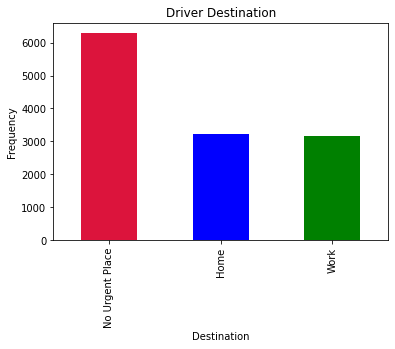

In [10]:
# Distribution of driver destination
plt.title('Driver Destination')
plt.xlabel('Destination')
plt.ylabel('Frequency')
originaldf['destination'].value_counts().plot(kind='bar', color=['crimson','blue','green','cyan'])
originaldf['destination'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

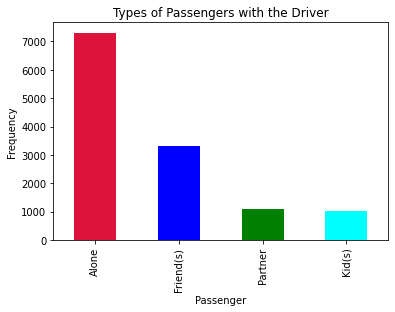

In [11]:
# Distribution of passenger
plt.title('Types of Passengers with the Driver')
plt.xlabel('Passenger')
plt.ylabel('Frequency')
originaldf['passanger'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan'])
originaldf['passanger'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

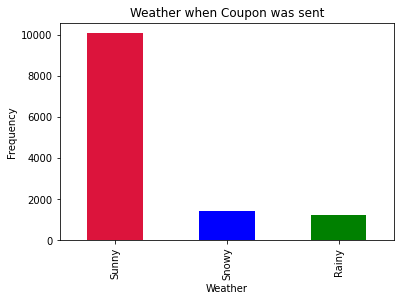

In [12]:
# Distribution of weather
plt.title('Weather when Coupon was sent')
plt.xlabel('Weather')
plt.ylabel('Frequency')
originaldf['weather'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan'])
originaldf['weather'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

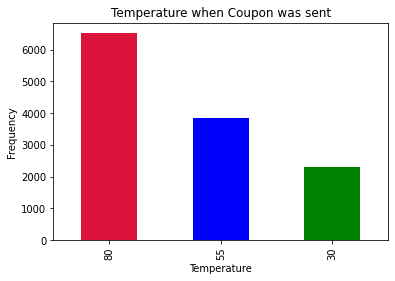

In [13]:
# Distribution of temperature
plt.title('Temperature when Coupon was sent')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
originaldf['temperature'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan'])
originaldf['temperature'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

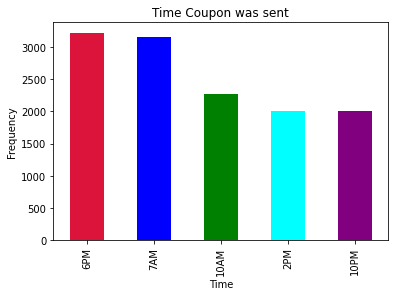

In [14]:
# Distribution of time
plt.title('Time Coupon was sent')
plt.xlabel('Time')
plt.ylabel('Frequency')
originaldf['time'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['time'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

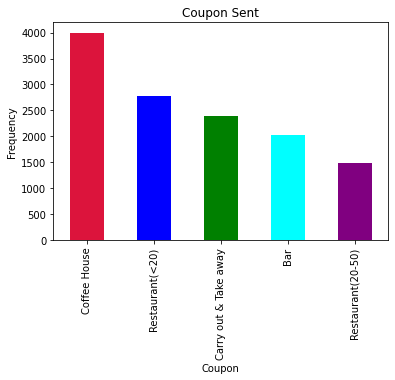

In [15]:
# Distribution of coupon
plt.title('Coupon Sent')
plt.xlabel('Coupon')
plt.ylabel('Frequency')
originaldf['coupon'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['coupon'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

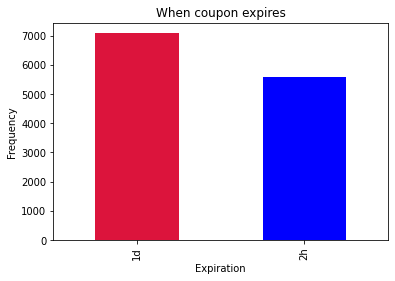

In [16]:
# Distribution of expiration
plt.title('When coupon expires')
plt.xlabel('Expiration')
plt.ylabel('Frequency')
originaldf['expiration'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['expiration'].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

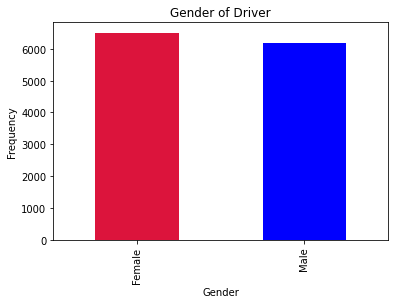

In [17]:
# Distribution of driver gender
plt.title('Gender of Driver')
plt.xlabel('Gender')
plt.ylabel('Frequency')
originaldf['gender'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['gender'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

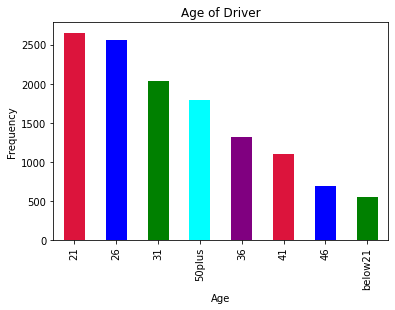

In [18]:
# Distribution of driver age
plt.title('Age of Driver')
plt.xlabel('Age')
plt.ylabel('Frequency')
originaldf['age'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['age'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

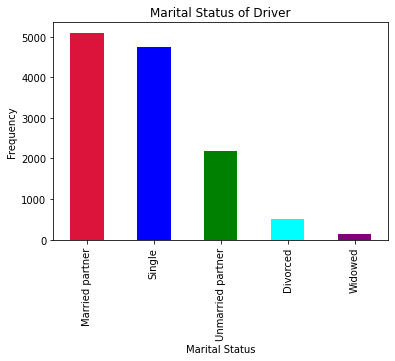

In [19]:
# Distribution of driver marital status
plt.title('Marital Status of Driver')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
originaldf['maritalStatus'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['maritalStatus'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

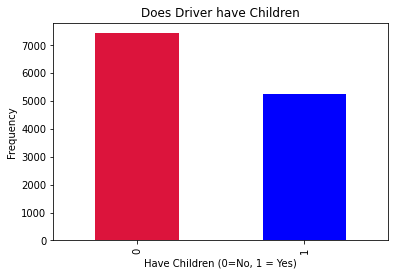

In [20]:
# Distribution of has_children
plt.title('Does Driver have Children')
plt.xlabel('Have Children (0=No, 1 = Yes)')
plt.ylabel('Frequency')
originaldf['has_children'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['has_children'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

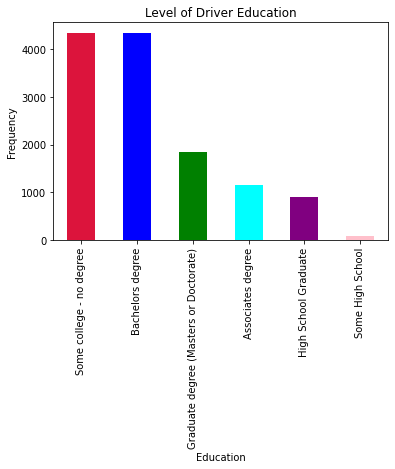

In [21]:
# Distribution of education
plt.title('Level of Driver Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
originaldf['education'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink'])
originaldf['education'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Protective Service                            175
Personal Care & Service                       175
Architecture & Engineering                    175
Life Physical Social Science                  170


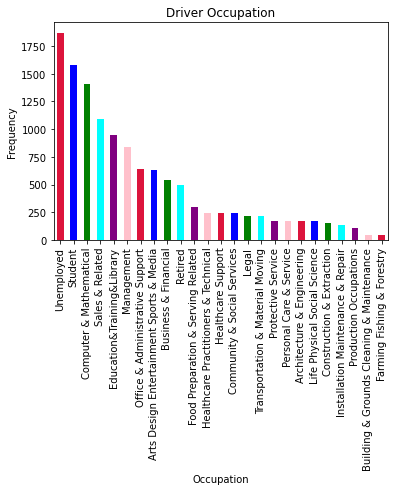

In [22]:
# Distribution of occupation
plt.title('Driver Occupation')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
originaldf['occupation'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink'])
originaldf['occupation'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

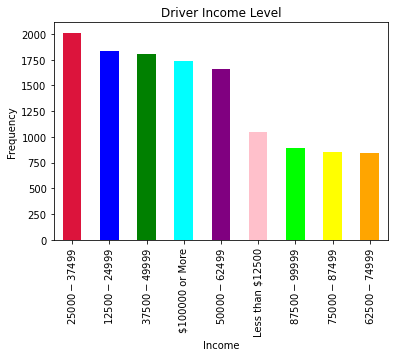

In [23]:
# Distribution of income
plt.title('Driver Income Level')
plt.xlabel('Income')
plt.ylabel('Frequency')
originaldf['income'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['income'].value_counts()

Mazda5                                      22
Scooter and motorcycle                      22
do not drive                                22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64

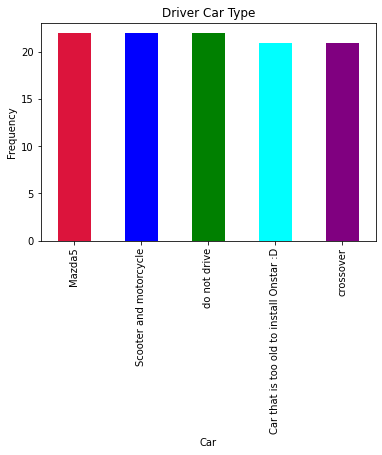

In [24]:
# Distribution of car
plt.title('Driver Car Type')
plt.xlabel('Car')
plt.ylabel('Frequency')
originaldf['car'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['car'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

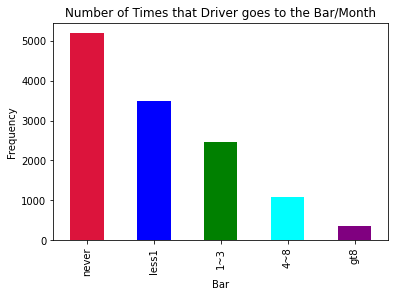

In [25]:
# Distribution of bar
plt.title('Number of Times that Driver goes to the Bar/Month')
plt.xlabel('Bar')
plt.ylabel('Frequency')
originaldf['Bar'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['Bar'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

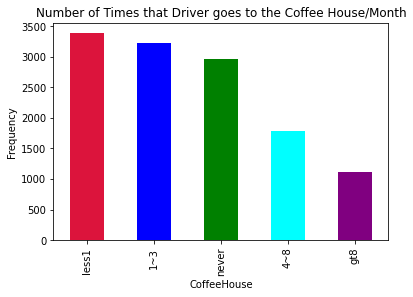

In [26]:
# Distribution of Coffee House
plt.title('Number of Times that Driver goes to the Coffee House/Month')
plt.xlabel('CoffeeHouse')
plt.ylabel('Frequency')
originaldf['CoffeeHouse'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['CoffeeHouse'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

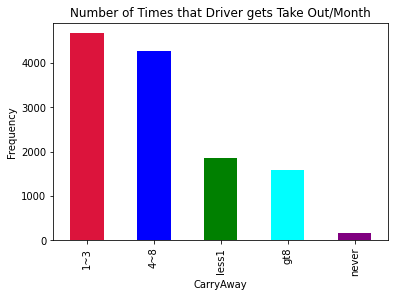

In [27]:
# Distribution of Carry Away
plt.title('Number of Times that Driver gets Take Out/Month')
plt.xlabel('CarryAway')
plt.ylabel('Frequency')
originaldf['CarryAway'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['CarryAway'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

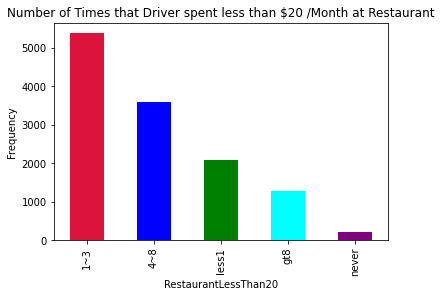

In [28]:
# Distribution of Restaurant Less than 20
plt.title('Number of Times that Driver spent less than $20 /Month at Restaurant')
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Frequency')
originaldf['RestaurantLessThan20'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['RestaurantLessThan20'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

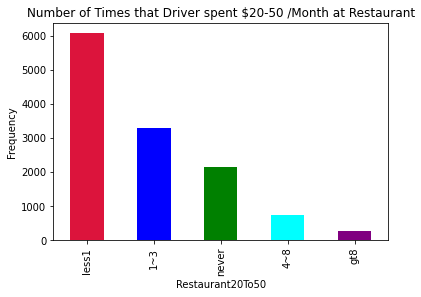

In [29]:
# Distribution of Restaurant Less than 20
plt.title('Number of Times that Driver spent $20-50 /Month at Restaurant')
plt.xlabel('Restaurant20To50')
plt.ylabel('Frequency')
originaldf['Restaurant20To50'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['Restaurant20To50'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

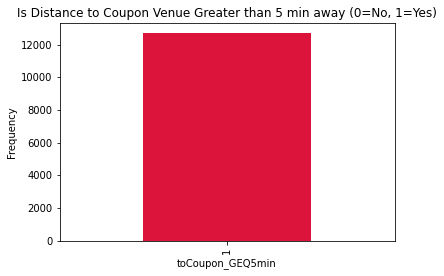

In [30]:
# Distribution of toCoupon_GEQ5min
plt.title('Is Distance to Coupon Venue Greater than 5 min away (0=No, 1=Yes)')
plt.xlabel('toCoupon_GEQ5min')
plt.ylabel('Frequency')
originaldf['toCoupon_GEQ5min'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['toCoupon_GEQ5min'].value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

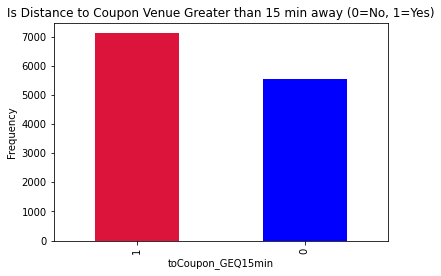

In [31]:
# Distribution of toCoupon_GEQ15min
plt.title('Is Distance to Coupon Venue Greater than 15 min away (0=No, 1=Yes)')
plt.xlabel('toCoupon_GEQ15min')
plt.ylabel('Frequency')
originaldf['toCoupon_GEQ15min'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['toCoupon_GEQ15min'].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

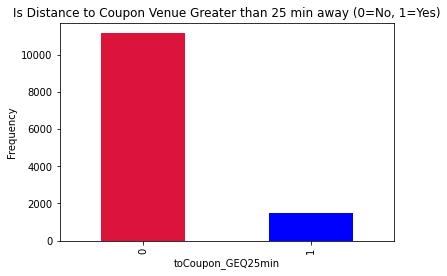

In [32]:
# Distribution of toCoupon_GEQ25min
plt.title('Is Distance to Coupon Venue Greater than 25 min away (0=No, 1=Yes)')
plt.xlabel('toCoupon_GEQ25min')
plt.ylabel('Frequency')
originaldf['toCoupon_GEQ25min'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['toCoupon_GEQ25min'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

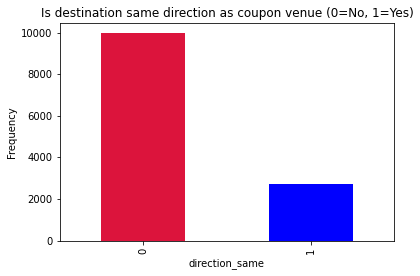

In [33]:
# Distribution of direction_same
plt.title('Is destination same direction as coupon venue (0=No, 1=Yes)')
plt.xlabel('direction_same')
plt.ylabel('Frequency')
originaldf['direction_same'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['direction_same'].value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

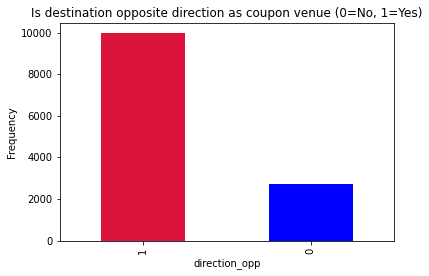

In [34]:
# Distribution of direction_opp
plt.title('Is destination opposite direction as coupon venue (0=No, 1=Yes)')
plt.xlabel('direction_opp')
plt.ylabel('Frequency')
originaldf['direction_opp'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['direction_opp'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

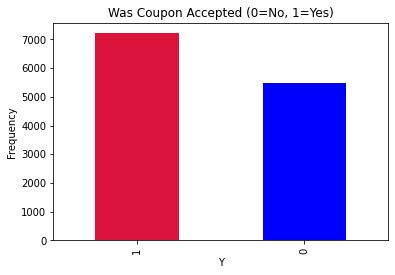

In [35]:
# Distribution of Y
plt.title('Was Coupon Accepted (0=No, 1=Yes)')
plt.xlabel('Y')
plt.ylabel('Frequency')
originaldf['Y'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['Y'].value_counts()

# Create Dataframe to be used Training and Test Sets

In [36]:
# Split data before applying data cleaning and feature selection to avoid data leakage
# Test set should not be used to train model
# First copy original dataset to new dataframe

df = originaldf.copy()
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


## Modify Attributes Before Splitting the Data

### **Combine Coupon and Y attribute to make new multi-class target variable**

In [ ]:
# The dataset contains two attributes, namely 'coupon' and 'Y'
# Before splitting the data, these two attributes will be combined in order to have the same target attribute between training and test sets
# The next steps will turn a binary target attribute into a multi class target attribute.  Hence these steps are being performed before splitting the data
# This is also done to ensure that when using the stratify feature for the train test split, the multi classes will be distributed properly

In [37]:
# Create function to compare coupon and Y attributes
# The function compares 'coupon' and 'Y'
# If 'Y' = 1 it means the coupon was accepted and the function will return the coupon attribute value
# If 'Y' = 0 it means that the coupon was not accepted and the function will return 'Not Accepted'
def combineAtt(s):
    if s['Y'] == 1:
        return s['coupon']
    else:
        return "Not Accepted"

In [38]:
# Apply function and create new target attribute
df['couponAccepted']=df.apply(combineAtt,axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [41]:
# Check that coupon and Y attribute merged properly

subsetcols = ['coupon','Y','couponAccepted']
subsetcheck = df[subsetcols]
subsetcheck.head(10)

,coupon,Y,couponAccepted
0,Restaurant(<20),1,Restaurant(<20)
1,Coffee House,0,Not Accepted
2,Carry out & Take away,1,Carry out & Take away
3,Coffee House,0,Not Accepted
4,Coffee House,0,Not Accepted
5,Restaurant(<20),1,Restaurant(<20)
6,Carry out & Take away,1,Carry out & Take away
7,Restaurant(<20),1,Restaurant(<20)
8,Carry out & Take away,1,Carry out & Take away
9,Bar,0,Not Accepted


In [42]:
# Check unique values of target variable
df['couponAccepted'].unique()

array(['Restaurant(<20)', 'Not Accepted', 'Carry out & Take away',
       'Coffee House', 'Bar', 'Restaurant(20-50)'], dtype=object)

Not Accepted             5474
Coffee House             1995
Restaurant(<20)          1970
Carry out & Take away    1760
Bar                       827
Restaurant(20-50)         658
Name: couponAccepted, dtype: int64

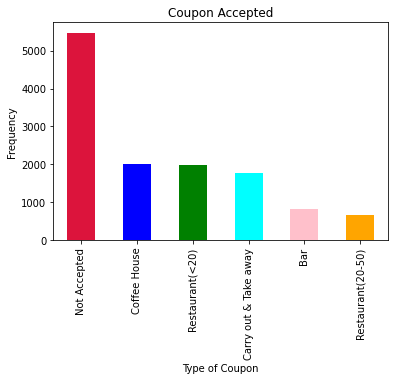

In [43]:
# Count number of occurences for each class label of target variable
# It can be seen that the new multiclass target attribute is unbalanced
plt.title('Coupon Accepted')
plt.xlabel('Type of Coupon')
plt.ylabel('Frequency')
df['couponAccepted'].value_counts().plot(kind='bar', color=['crimson','blue','green','cyan','pink','orange'])
df['couponAccepted'].value_counts()

In [44]:
# Now that couponAccepted is created, attributes Y and coupon are redundant. Therefore need to be removed
df = df.drop(columns=['coupon','Y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

### Modify Expiration Attribute

In [ ]:
# Expiration attribute only has 2 values either 2 hours or 1 day
# To avoid having to encode this attribute for machine learning algorithms, this attribute values will be changed to numeric and represent number of hours
# 2h will become 2 (representing 2 hours)
# 1d will become 24 (representing 24 hours in a day)

In [45]:
df['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [46]:
# Replace 2h with 2 and 1d with 24
df['expiration'].replace({'2h':2, '1d':24}, inplace=True) # inplace=True means updates column

In [47]:
df['expiration'].value_counts()

24    7091
2     5593
Name: expiration, dtype: int64

### Check new totals for datatypes

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   expiration            12684 non-null  int64 
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

# Create Stratified Training and Test Sets

In [49]:
# Identify the target variable
targetClass = 'couponAccepted'

# Identify feature names
df_feature_names = df.columns[df.columns != targetClass]
df_feature_names

Index(['destination', 'passanger', 'weather', 'temperature', 'time',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp'],
      dtype='object')

In [50]:
# Display the target attribute
df[targetClass]

0              Restaurant(<20)
1                 Not Accepted
2        Carry out & Take away
3                 Not Accepted
4                 Not Accepted
                 ...          
12679    Carry out & Take away
12680    Carry out & Take away
12681             Not Accepted
12682             Not Accepted
12683             Not Accepted
Name: couponAccepted, Length: 12684, dtype: object

In [51]:
# Display all the feature attributes
df.loc[:, df_feature_names]

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,24,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0
12680,Work,Alone,Rainy,55,7AM,24,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,24,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,24,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1


In [52]:
# Split data into training (70%) and test (30%)
# test_size = 30%
# random_state controls the shuffling applied.  Having a seed value allows for repeatable outcome
# shuffle allows for shuffling of data before splitting
# stratify allows same distribution of target classes in train and test since target attribute is unbalanced
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df_feature_names], df[targetClass], test_size=0.3, random_state = 100, shuffle = True, stratify = df[targetClass])

In [53]:
# Check splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8878, 24), (3806, 24), (8878,), (3806,))

In [54]:
# Display attributes in training set
x_train

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
9066,No Urgent Place,Alone,Sunny,80,10AM,2,Female,26,Married partner,1,Bachelors degree,Computer & Mathematical,$100000 or More,NaN,1~3,1~3,4~8,4~8,less1,1,1,0,0,1
6037,Home,Alone,Sunny,80,6PM,24,Female,26,Unmarried partner,0,Some college - no degree,Management,$37500 - $49999,NaN,less1,less1,less1,1~3,less1,1,0,0,1,0
10395,Home,Alone,Sunny,80,6PM,24,Male,41,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,$37500 - $49999,NaN,NaN,less1,1~3,4~8,1~3,1,0,0,1,0
12633,Work,Alone,Sunny,80,7AM,2,Female,21,Unmarried partner,0,Bachelors degree,Unemployed,$37500 - $49999,NaN,never,4~8,1~3,1~3,less1,1,0,0,1,0
8591,No Urgent Place,Partner,Sunny,80,10PM,24,Female,21,Unmarried partner,0,Bachelors degree,Education&Training&Library,$25000 - $37499,NaN,1~3,1~3,less1,1~3,never,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,Work,Alone,Rainy,55,7AM,24,Male,46,Single,0,Some college - no degree,Sales & Related,Less than $12500,NaN,1~3,1~3,4~8,4~8,4~8,1,0,0,0,1
6001,Work,Alone,Sunny,80,7AM,24,Female,50plus,Divorced,0,Graduate degree (Masters or Doctorate),Retired,$37500 - $49999,NaN,never,never,4~8,1~3,never,1,1,1,0,1
5008,No Urgent Place,Friend(s),Sunny,80,6PM,24,Female,31,Married partner,0,Some college - no degree,Unemployed,$50000 - $62499,NaN,never,never,1~3,gt8,1~3,1,1,0,0,1
6693,No Urgent Place,Friend(s),Rainy,55,10AM,2,Male,21,Single,0,High School Graduate,Unemployed,Less than $12500,NaN,4~8,gt8,less1,1~3,never,1,1,0,0,1


In [55]:
# Verify that split has stratified the dataset
y_train.value_counts()

Not Accepted             3831
Coffee House             1396
Restaurant(<20)          1379
Carry out & Take away    1232
Bar                       579
Restaurant(20-50)         461
Name: couponAccepted, dtype: int64

## Processing the Training Set

### Impute Null Values

In [56]:
# Check for null values
x_train.isna().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     8815
Bar                       78
CoffeeHouse              148
CarryAway                110
RestaurantLessThan20      89
Restaurant20To50         129
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64

In [ ]:
# Since the dataset is categorical, missing values should be replaced the value having the highest mode for each attribute
# These values should also be applied to the test set, if missing values are encountered

#### Car

In [57]:
# This attribute is basically missing values for almost all the records.  As such, it will not provide much value to the machine learning algorithms
# Therefore it will be dropped from the training dataset
x_train = x_train.drop(columns=['car'])
print('car attribute dropped')

car attribute dropped


#### Bar

In [58]:
# Check number of NA values
x_train['Bar'].isna().sum()

78

In [59]:
# Check for highest mode and ensure no tie in mode
x_train['Bar'].value_counts()

never    3646
less1    2423
1~3      1723
4~8       761
gt8       247
Name: Bar, dtype: int64

In [60]:
# Create variable to store the mode for attribute in case it needs to be applied to the test set
bar_mode = x_train['Bar'].mode()[0]
bar_mode

'never'

In [61]:
# Replace Null values for Bar with mode
x_train['Bar'] = x_train['Bar'].fillna(bar_mode)
x_train['Bar'].value_counts()

never    3724
less1    2423
1~3      1723
4~8       761
gt8       247
Name: Bar, dtype: int64

#### Coffee House

In [62]:
# Check number of NA values
x_train['CoffeeHouse'].isna().sum()

148

In [63]:
# Check for highest mode and ensure no tie in mode
x_train['CoffeeHouse'].value_counts()

less1    2402
1~3      2253
never    2083
4~8      1221
gt8       771
Name: CoffeeHouse, dtype: int64

In [64]:
# Create variable to store the mode for the attribute in case it needs to be applied to the test set
CoffeeHouse_mode = x_train['CoffeeHouse'].mode()[0]
CoffeeHouse_mode

'less1'

In [65]:
# Replace Null values for CoffeeHouse with mode
x_train['CoffeeHouse'] = x_train['CoffeeHouse'].fillna(CoffeeHouse_mode)
x_train['CoffeeHouse'].value_counts()

less1    2550
1~3      2253
never    2083
4~8      1221
gt8       771
Name: CoffeeHouse, dtype: int64

#### Carry Away

In [66]:
# Check number of NA values
x_train['CarryAway'].isna().sum()

110

In [67]:
# Check for highest mode and ensure no tie in mode
x_train['CarryAway'].value_counts()

1~3      3277
4~8      2955
less1    1323
gt8      1102
never     111
Name: CarryAway, dtype: int64

In [68]:
# Create variable to store the mode for the attribute in case it needs to be applied to the test set
CarryAway_mode = x_train['CarryAway'].mode()[0]
CarryAway_mode

'1~3'

In [69]:
# Replace Null values for CarryAway with mode
x_train['CarryAway'] = x_train['CarryAway'].fillna(CarryAway_mode)
x_train['CarryAway'].value_counts()

1~3      3387
4~8      2955
less1    1323
gt8      1102
never     111
Name: CarryAway, dtype: int64

#### Restaurant Less than 20

In [70]:
# Check number of NA values
x_train['RestaurantLessThan20'].isna().sum()

89

In [71]:
# Check for highest mode and ensure no tie in mode
x_train['RestaurantLessThan20'].value_counts()

1~3      3817
4~8      2470
less1    1446
gt8       905
never     151
Name: RestaurantLessThan20, dtype: int64

In [72]:
# Create variable to store the mode for the attribute in case it needs to be applied to the test set
RestaurantLessThan20_mode = x_train['RestaurantLessThan20'].mode()[0]
RestaurantLessThan20_mode

'1~3'

In [73]:
# Replace Null values for RestaurantLessThan20 with mode
x_train['RestaurantLessThan20'] = x_train['RestaurantLessThan20'].fillna(RestaurantLessThan20_mode)
x_train['RestaurantLessThan20'].value_counts()

1~3      3906
4~8      2470
less1    1446
gt8       905
never     151
Name: RestaurantLessThan20, dtype: int64

#### Restaurant 20 to 50

In [74]:
# Check number of NA values
x_train['Restaurant20To50'].isna().sum()

129

In [75]:
# Check for highest mode and ensure no tie in mode
x_train['Restaurant20To50'].value_counts()

less1    4255
1~3      2330
never    1467
4~8       509
gt8       188
Name: Restaurant20To50, dtype: int64

In [76]:
# Create variable to store the mode for the attribute in case it needs to be applied to the test set
Restaurant20To50_mode = x_train['Restaurant20To50'].mode()[0]
Restaurant20To50_mode

'less1'

In [77]:
# Replace Null values for Restaurant20To50 with mode
x_train['Restaurant20To50'] = x_train['Restaurant20To50'].fillna(Restaurant20To50_mode)
x_train['Restaurant20To50'].value_counts()

less1    4384
1~3      2330
never    1467
4~8       509
gt8       188
Name: Restaurant20To50, dtype: int64

#### Verify that all Null Values in Training Set are Removed

In [78]:
x_train.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
dtype: int64

### **Encoding: Ordinal Categorical Attribute**

In [79]:
# There are several attributes that are ordinal and must be encoded that way so that the model does not overfit.  
# It also allows less attributes to be one hot encoded (i.e. creating more columns)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8878 entries, 9066 to 12444
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           8878 non-null   object
 1   passanger             8878 non-null   object
 2   weather               8878 non-null   object
 3   temperature           8878 non-null   int64 
 4   time                  8878 non-null   object
 5   expiration            8878 non-null   int64 
 6   gender                8878 non-null   object
 7   age                   8878 non-null   object
 8   maritalStatus         8878 non-null   object
 9   has_children          8878 non-null   int64 
 10  education             8878 non-null   object
 11  occupation            8878 non-null   object
 12  income                8878 non-null   object
 13  Bar                   8878 non-null   object
 14  CoffeeHouse           8878 non-null   object
 15  CarryAway             8878 non-nul

#### Temperature

In [80]:
# Original temperature attribute
df['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [ ]:
# This atttribute will be kept as integer value.  Encoding it will make the algorithm assume the distance between each encoded value is the same

#### LEAVE AS STRING SINCE CYCLIC Time

In [81]:
# Original time attribute
df['time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

In [ ]:
# Since time is cyclic, no ranking can be established. Therefore this attribute will not be ordinally encoded

#### Age

In [82]:
# Original age attribute
x_train['age'].value_counts()

21         1887
26         1800
31         1388
50plus     1262
36          925
41          751
46          487
below21     378
Name: age, dtype: int64

In [83]:
# Encoding the age attribute 

# Create dictionary
dict_age = [{'col':'age','mapping':{'below21':1, '21':2, '26':3, '31':4, '36':5, '41':6, '46':7, '50plus':8}}]

# Create encoder for ordinal encoding
enc_age = ce.OrdinalEncoder(cols='age',mapping=dict_age)

# Fit and transform data
x_train['age'] = enc_age.fit_transform(x_train['age'])

In [84]:
# After encoding age attribute
x_train['age'].value_counts()

2    1887
3    1800
4    1388
8    1262
5     925
6     751
7     487
1     378
Name: age, dtype: int64

#### Education

In [85]:
x_train['education'].value_counts()

Bachelors degree                          3089
Some college - no degree                  3023
Graduate degree (Masters or Doctorate)    1265
Associates degree                          811
High School Graduate                       630
Some High School                            60
Name: education, dtype: int64

In [ ]:
# It was decided not to ordinal encode the 'education' attribute since after highschool, a person can do either college or university. 
# There is no ranking (i.e. is 'some college-no degree' higher or lower ranking than 'bachelors degree')
# Therefore this attribute will not be ordinally encoded

#### Income

In [86]:
# Original income attribute
x_train['income'].value_counts()

$25000 - $37499     1405
$12500 - $24999     1303
$37500 - $49999     1264
$100000 or More     1235
$50000 - $62499     1150
Less than $12500     737
$87500 - $99999      615
$75000 - $87499      589
$62500 - $74999      580
Name: income, dtype: int64

In [87]:
# Encoding the income attribute 

# Create dictionary
dict_income = [{'col':'income','mapping':{'Less than $12500':1, '$12500 - $24999':2, '$25000 - $37499':3, '$37500 - $49999':4, '$50000 - $62499':5, '$62500 - $74999':6, '$75000 - $87499':7, 
                                          '$87500 - $99999':8, '$100000 or More':9}}]

# Create encoder for ordinal encoding
enc_income = ce.OrdinalEncoder(cols='income',mapping=dict_income)

# Fit and transform data
x_train['income'] = enc_income.fit_transform(x_train['income'])

In [88]:
# After encoding income attribute
x_train['income'].value_counts()

3    1405
2    1303
4    1264
9    1235
5    1150
1     737
8     615
7     589
6     580
Name: income, dtype: int64

#### Bar

In [89]:
# Before encoding Bar attribute
x_train['Bar'].value_counts()

never    3724
less1    2423
1~3      1723
4~8       761
gt8       247
Name: Bar, dtype: int64

In [90]:
# Encoding the Bar attribute

# Create dictionary
dict_bar = [{'col':'Bar', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
enc_bar = ce.OrdinalEncoder(cols='Bar', mapping=dict_bar)

# Fit and transform data
x_train['Bar'] = enc_bar.fit_transform(x_train['Bar'])

In [91]:
# After encoding Bar attribute
x_train['Bar'].value_counts()

1    3724
2    2423
3    1723
4     761
5     247
Name: Bar, dtype: int64

#### Coffee House

In [92]:
# Before encoding Coffee House Attribute
x_train['CoffeeHouse'].value_counts()

less1    2550
1~3      2253
never    2083
4~8      1221
gt8       771
Name: CoffeeHouse, dtype: int64

In [93]:
# Encoding the Coffee House Attribute

# Create dictionary
dict_cof = [{'col':'CoffeeHouse', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
enc_cof = ce.OrdinalEncoder(cols='CoffeeHouse', mapping=dict_cof)

# Fit and transform data
x_train['CoffeeHouse'] = enc_cof.fit_transform(x_train['CoffeeHouse'])

In [94]:
# After encoding the Coffee House attribute
x_train['CoffeeHouse'].value_counts()

2    2550
3    2253
1    2083
4    1221
5     771
Name: CoffeeHouse, dtype: int64

#### Carry Away

In [95]:
# Before encoding Coffee House Attribute
x_train['CarryAway'].value_counts()

1~3      3387
4~8      2955
less1    1323
gt8      1102
never     111
Name: CarryAway, dtype: int64

In [96]:
# Encoding the Carry Away Attribute

# Create dictionary
dict_carry = [{'col':'CarryAway', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
enc_carry = ce.OrdinalEncoder(cols='CarryAway', mapping=dict_carry)

# Fit and transform data
x_train['CarryAway'] = enc_carry.fit_transform(x_train['CarryAway'])

In [97]:
# After encoding the Carry Away attribute
x_train['CarryAway'].value_counts()

3    3387
4    2955
2    1323
5    1102
1     111
Name: CarryAway, dtype: int64

#### Restaurant Less than 20

In [98]:
# Before encoding Restaurant Less than 20 Attribute
x_train['RestaurantLessThan20'].value_counts()

1~3      3906
4~8      2470
less1    1446
gt8       905
never     151
Name: RestaurantLessThan20, dtype: int64

In [99]:
# Encoding the Restaurant Less Than 20 Attribute

# Create dictionary
dict_rest20 = [{'col':'RestaurantLessThan20', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
enc_rest20 = ce.OrdinalEncoder(cols='RestaurantLessThan20', mapping=dict_rest20)

# Fit and transform data
x_train['RestaurantLessThan20'] = enc_rest20.fit_transform(x_train['RestaurantLessThan20'])

In [100]:
# After encoding the Carry Away attribute
x_train['RestaurantLessThan20'].value_counts()

3    3906
4    2470
2    1446
5     905
1     151
Name: RestaurantLessThan20, dtype: int64

#### Restaurant 20 to 50

In [101]:
# Before encoding Restaurant 20 to 50 Attribute
x_train['Restaurant20To50'].value_counts()

less1    4384
1~3      2330
never    1467
4~8       509
gt8       188
Name: Restaurant20To50, dtype: int64

In [102]:
# Encoding the Restaurant 20 to 50Attribute

# Create dictionary
dict_rest50 = [{'col':'Restaurant20To50', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
enc_rest50 = ce.OrdinalEncoder(cols='Restaurant20To50', mapping=dict_rest50)

# Fit and transform data
x_train['Restaurant20To50'] = enc_rest50.fit_transform(x_train['Restaurant20To50'])

In [103]:
# After encoding the Carry Away attribute
x_train['Restaurant20To50'].value_counts()

2    4384
3    2330
1    1467
4     509
5     188
Name: Restaurant20To50, dtype: int64

#### Verify data type distribution

In [104]:
x_train.head()

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
9066,No Urgent Place,Alone,Sunny,80,10AM,2,Female,3,Married partner,1,Bachelors degree,Computer & Mathematical,9,3,3,4,4,2,1,1,0,0,1
6037,Home,Alone,Sunny,80,6PM,24,Female,3,Unmarried partner,0,Some college - no degree,Management,4,2,2,2,3,2,1,0,0,1,0
10395,Home,Alone,Sunny,80,6PM,24,Male,6,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,4,1,2,3,4,3,1,0,0,1,0
12633,Work,Alone,Sunny,80,7AM,2,Female,2,Unmarried partner,0,Bachelors degree,Unemployed,4,1,4,3,3,2,1,0,0,1,0
8591,No Urgent Place,Partner,Sunny,80,10PM,24,Female,2,Unmarried partner,0,Bachelors degree,Education&Training&Library,3,3,3,2,3,1,1,1,0,0,1


In [105]:
# Check new data type distribution
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8878 entries, 9066 to 12444
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           8878 non-null   object
 1   passanger             8878 non-null   object
 2   weather               8878 non-null   object
 3   temperature           8878 non-null   int64 
 4   time                  8878 non-null   object
 5   expiration            8878 non-null   int64 
 6   gender                8878 non-null   object
 7   age                   8878 non-null   int64 
 8   maritalStatus         8878 non-null   object
 9   has_children          8878 non-null   int64 
 10  education             8878 non-null   object
 11  occupation            8878 non-null   object
 12  income                8878 non-null   int64 
 13  Bar                   8878 non-null   int64 
 14  CoffeeHouse           8878 non-null   int64 
 15  CarryAway             8878 non-nul

### Encoding: One Hot Encoding of Unordered Categorical Attribute

In [106]:
# make copy of dataframe to be used for one hot encoding
hot_x_train = x_train.copy()
hot_x_train

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
9066,No Urgent Place,Alone,Sunny,80,10AM,2,Female,3,Married partner,1,Bachelors degree,Computer & Mathematical,9,3,3,4,4,2,1,1,0,0,1
6037,Home,Alone,Sunny,80,6PM,24,Female,3,Unmarried partner,0,Some college - no degree,Management,4,2,2,2,3,2,1,0,0,1,0
10395,Home,Alone,Sunny,80,6PM,24,Male,6,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,4,1,2,3,4,3,1,0,0,1,0
12633,Work,Alone,Sunny,80,7AM,2,Female,2,Unmarried partner,0,Bachelors degree,Unemployed,4,1,4,3,3,2,1,0,0,1,0
8591,No Urgent Place,Partner,Sunny,80,10PM,24,Female,2,Unmarried partner,0,Bachelors degree,Education&Training&Library,3,3,3,2,3,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,Work,Alone,Rainy,55,7AM,24,Male,7,Single,0,Some college - no degree,Sales & Related,1,3,3,4,4,4,1,0,0,0,1
6001,Work,Alone,Sunny,80,7AM,24,Female,8,Divorced,0,Graduate degree (Masters or Doctorate),Retired,4,1,1,4,3,1,1,1,1,0,1
5008,No Urgent Place,Friend(s),Sunny,80,6PM,24,Female,4,Married partner,0,Some college - no degree,Unemployed,5,1,1,3,5,3,1,1,0,0,1
6693,No Urgent Place,Friend(s),Rainy,55,10AM,2,Male,2,Single,0,High School Graduate,Unemployed,1,4,5,2,3,1,1,1,0,0,1


In [107]:
# create list of categorical variables to be encoded.
catCols = ['destination','passanger','weather', 'time', 'gender', 'maritalStatus', 'education', 'occupation' ]

# perform the one hot encoding
# columns = variables to be encoded
# prefix = name to appear in front of dummy variables
hot_x_train = pd.get_dummies(hot_x_train, columns = catCols, prefix = catCols)

In [108]:
hot_x_train

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
9066,80,2,3,1,9,3,3,4,4,2,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6037,80,24,3,0,4,2,2,2,3,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10395,80,24,6,1,4,1,2,3,4,3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12633,80,2,2,0,4,1,4,3,3,2,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8591,80,24,2,0,3,3,3,2,3,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,55,24,7,0,1,3,3,4,4,4,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6001,80,24,8,0,4,1,1,4,3,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5008,80,24,4,0,5,1,1,3,5,3,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6693,55,2,2,0,1,4,5,2,3,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Create training set dataframe

In [109]:
# Before encoding
y_train.value_counts()

Not Accepted             3831
Coffee House             1396
Restaurant(<20)          1379
Carry out & Take away    1232
Bar                       579
Restaurant(20-50)         461
Name: couponAccepted, dtype: int64

In [110]:
y_train

9066              Coffee House
6037              Coffee House
10395             Not Accepted
12633             Not Accepted
8591           Restaurant(<20)
                 ...          
11053             Not Accepted
6001     Carry out & Take away
5008           Restaurant(<20)
6693     Carry out & Take away
12444             Not Accepted
Name: couponAccepted, Length: 8878, dtype: object

In [111]:
# Make new dataframe for training set
hot_train = pd.concat([hot_x_train,y_train], axis=1)
hot_train

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,couponAccepted
9066,80,2,3,1,9,3,3,4,4,2,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Coffee House
6037,80,24,3,0,4,2,2,2,3,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Coffee House
10395,80,24,6,1,4,1,2,3,4,3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Not Accepted
12633,80,2,2,0,4,1,4,3,3,2,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Not Accepted
8591,80,24,2,0,3,3,3,2,3,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Restaurant(<20)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,55,24,7,0,1,3,3,4,4,4,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Not Accepted
6001,80,24,8,0,4,1,1,4,3,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Carry out & Take away
5008,80,24,4,0,5,1,1,3,5,3,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Restaurant(<20)
6693,55,2,2,0,1,4,5,2,3,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Carry out & Take away


### Feature Selection Methods

In [ ]:
# Apply different feature selection techniques to determine best features for building the model

#### Information Gain

In [112]:
# Evaluate information gain of each attribute to the target attribute
from sklearn.feature_selection import mutual_info_classif

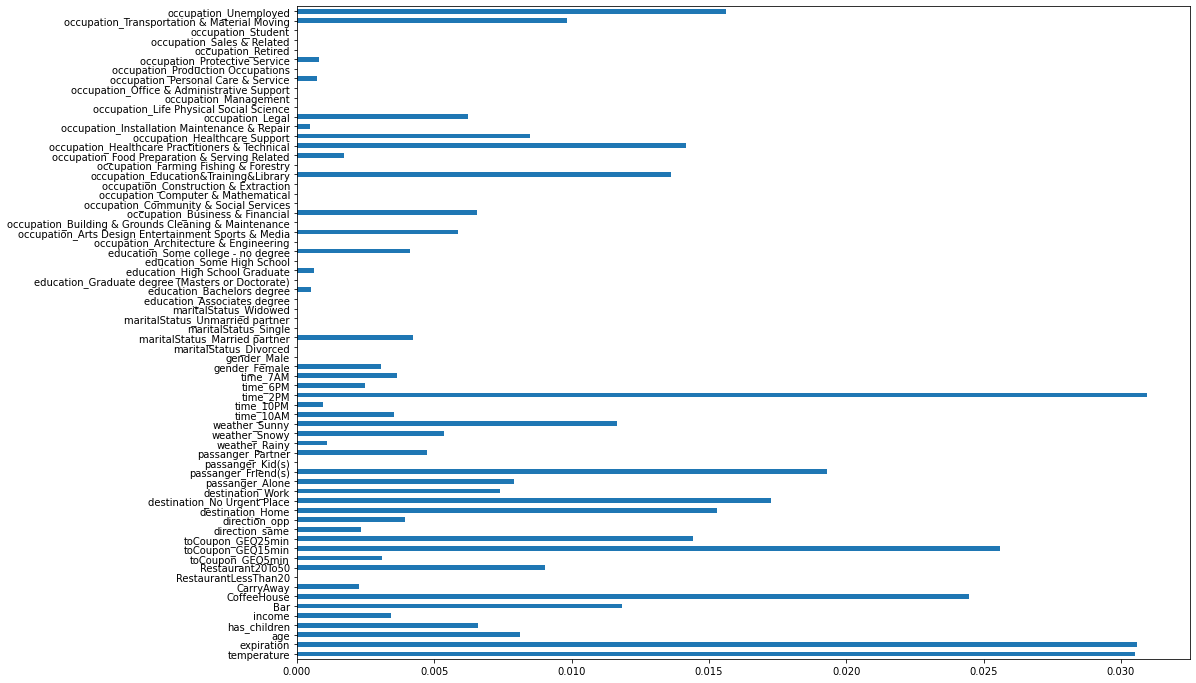

In [113]:
%matplotlib inline

importances = mutual_info_classif(hot_x_train,y_train, random_state=100)
feat_importances = pd.Series(importances, hot_train.columns[0:len(hot_x_train.columns)])
plt.figure(figsize = (16,12))
feat_importances.plot(kind='barh')
plt.show()

In [114]:
# Show top 20 features with highest information gain
feat_importances.sort_values(ascending=False).head(20)

time_2PM                                           0.030956
expiration                                         0.030583
temperature                                        0.030500
toCoupon_GEQ15min                                  0.025593
CoffeeHouse                                        0.024451
passanger_Friend(s)                                0.019296
destination_No Urgent Place                        0.017254
occupation_Unemployed                              0.015619
destination_Home                                   0.015297
toCoupon_GEQ25min                                  0.014415
occupation_Healthcare Practitioners & Technical    0.014168
occupation_Education&Training&Library              0.013612
Bar                                                0.011819
weather_Sunny                                      0.011642
occupation_Transportation & Material Moving        0.009821
Restaurant20To50                                   0.009025
occupation_Healthcare Support           

#### Chi Square

In [115]:
# Useful for categorical attributes feature selection with categorical target
from sklearn.feature_selection import chi2

In [116]:
# Create feature and target attribute variables

#chiX = hot_train.drop('couponAccepted', axis=1)
#chiY = hot_train['couponAccepted']

chiX = hot_x_train
chiY = y_train

In [117]:
chiX

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
9066,80,2,3,1,9,3,3,4,4,2,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6037,80,24,3,0,4,2,2,2,3,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10395,80,24,6,1,4,1,2,3,4,3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12633,80,2,2,0,4,1,4,3,3,2,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8591,80,24,2,0,3,3,3,2,3,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,55,24,7,0,1,3,3,4,4,4,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6001,80,24,8,0,4,1,1,4,3,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5008,80,24,4,0,5,1,1,3,5,3,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6693,55,2,2,0,1,4,5,2,3,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [118]:
chiY

9066              Coffee House
6037              Coffee House
10395             Not Accepted
12633             Not Accepted
8591           Restaurant(<20)
                 ...          
11053             Not Accepted
6001     Carry out & Take away
5008           Restaurant(<20)
6693     Carry out & Take away
12444             Not Accepted
Name: couponAccepted, Length: 8878, dtype: object

In [119]:
chi_scores = chi2(chiX, chiY)
chi_scores # First array is the chi square values and the second array is the p values

(array([1.91478023e+03, 2.73717323e+03, 6.67152868e+01, 3.33783520e+01,
        1.88962893e+01, 9.55366663e+01, 1.22551075e+02, 3.35250523e+00,
        6.93778835e+00, 2.68301787e+01, 3.70335160e-29, 1.12098687e+02,
        2.17186876e+02, 8.95749611e+01, 2.45534121e+01, 2.04903821e+02,
        2.31349434e+02, 6.67854273e+01, 6.43461921e+01, 2.03321391e+02,
        4.02782775e+01, 8.39364884e+01, 1.69767231e+02, 6.41545915e+01,
        4.56659671e+01, 1.42560594e+02, 1.61468039e+02, 2.72194783e+02,
        4.95994164e+01, 6.67854273e+01, 1.43284698e+01, 1.51451527e+01,
        7.36713789e+00, 1.70943850e+01, 2.86482849e+01, 3.16313786e+00,
        6.93872975e+00, 9.50655893e+00, 4.36834955e+00, 2.16049016e+01,
        1.94987580e+00, 1.04013552e+01, 1.48913897e+01, 7.89465787e+00,
        8.10147298e+00, 2.19378456e+00, 3.83446759e+00, 9.81891556e+00,
        6.75657867e+00, 8.78542937e+00, 7.53709895e+00, 1.73625881e+00,
        3.27340257e+00, 1.09948899e+01, 8.23549805e+00, 4.000655

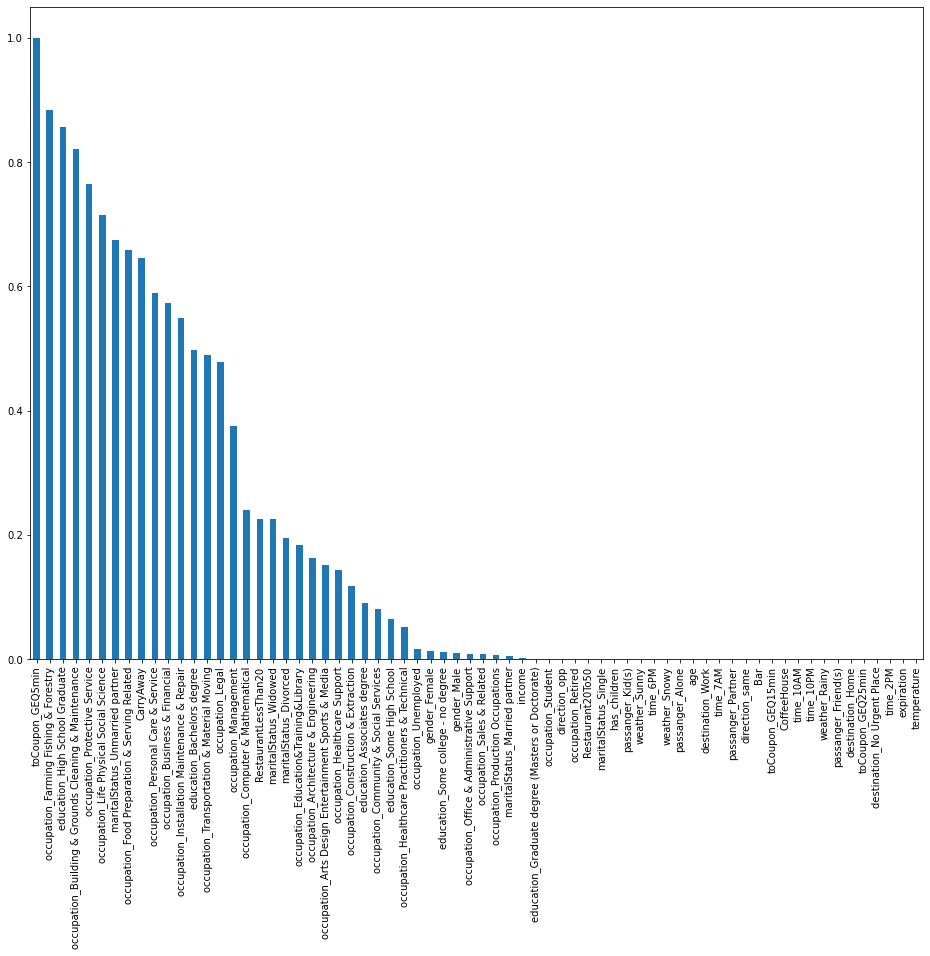

In [120]:
# Plot the P values
p_values = pd.Series(chi_scores[1], index =chiX.columns)
p_values.sort_values (ascending = False, inplace=True)
plt.figure(figsize = (16,12))
p_values.plot.bar()

In [121]:
# The higher the P value the more independent that attribute is and will not help model training
# Therefore, features with lower p values are better for target prediction
p_values.sort_values(ascending=True).head(20)

temperature                    0.000000e+00
expiration                     0.000000e+00
time_2PM                       9.453008e-57
destination_No Urgent Place    5.494771e-48
toCoupon_GEQ25min              5.950087e-45
destination_Home               2.536222e-42
passanger_Friend(s)            5.531035e-42
weather_Rainy                  8.180230e-35
time_10PM                      4.815630e-33
time_10AM                      5.108401e-29
CoffeeHouse                    9.041783e-25
toCoupon_GEQ15min              1.475261e-22
Bar                            4.603787e-19
direction_same                 8.252877e-18
passanger_Partner              1.257755e-16
time_7AM                       4.774507e-13
destination_Work               4.774507e-13
age                            4.937363e-13
passanger_Alone                1.531409e-12
weather_Snowy                  1.678084e-12
dtype: float64

#### PhiK Correlation

In [122]:
# Apply Phi K correlation
# Pearson's correlation is not sufficient when the dataset has a mixture of different data types
# Phi K correlation is based on Pearson's correlation and works when attributes are categorical, ordinal, and continuous within a dataset
# It captures non-linear dependency and reverts to the Pearson correlation coefficient in case of a bivariate normal input distribution.

phik_train = hot_train.phik_matrix()
phik_train

interval columns not set, guessing: ['temperature', 'expiration', 'age', 'has_children', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'destination_Home', 'destination_No Urgent Place', 'destination_Work', 'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM', 'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'gender_Female', 'gender_Male', 'maritalStatus_Divorced', 'maritalStatus_Married partner', 'maritalStatus_Single', 'maritalStatus_Unmarried partner', 'maritalStatus_Widowed', 'education_Associates degree', 'education_Bachelors degree', 'education_Graduate degree (Masters or Doctorate)', 'education_High School Graduate', 'education_Some High School', 'education_Some college - no degree', 'occupation_Architecture & Engineering', 'occupation_Arts Design Ent

/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:71: UserWarning: Not enough unique value for variable toCoupon_GEQ5min for analysis 1. Dropping this column
  .format(col, df[col].nunique())


,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,couponAccepted
temperature,1.000000,0.078903,0.041330,0.015502,0.098224,0.026372,0.026752,0.035102,0.041329,0.046224,0.107562,0.146676,0.084684,0.084684,0.055434,0.087219,0.088425,0.088792,0.085286,0.038596,0.049747,0.299445,0.492507,0.366919,0.112539,0.120112,0.062842,0.054943,0.088425,0.008701,0.008701,0.009534,0.014492,0.021381,0.020121,0.012147,0.022417,0.001737,0.012908,0.000000,0.000000,0.000000,0.020445,0.010583,0.018913,0.016677,0.010607,0.004217,0.016045,0.000000,0.011119,0.008875,0.006845,0.018458,0.006356,0.000000,0.020766,0.029018,0.009042,0.000000,0.004235,0.014771,0.010890,0.000000,0.007559,0.000000,0.015056,0.375148
expiration,0.078903,1.000000,0.031557,0.027127,0.000000,0.008038,0.015706,0.000000,0.009003,0.000000,0.059938,0.047164,0.042914,0.042914,0.000000,0.086610,0.091548,0.169504,0.153723,0.000000,0.042090,0.061789,0.175043,0.090834,0.146346,0.032228,0.119224,0.029978,0.091548,0.000000,0.000000,0.000000,0.036962,0.041800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013501,0.000000,0.000000,0.000000,0.000000,0.000000,0.013740,0.000000,0.000000,0.018894,0.000000,0.009714,0.000000,0.000000,0.000000,0.000000,0.013666,0.016385,0.035822,0.000000,0.034273,0.017617,0.000000,0.000000,0.004004,0.000000,0.000000,0.265349
age,0.041330,0.031557,1.000000,0.651539,0.285527,0.271481,0.207042,0.209535,0.199496,0.217352,0.022919,0.000000,0.038837,0.038837,0.009549,0.030265,0.000000,0.076994,0.029705,0.217138,0.054190,0.048790,0.035089,0.067776,0.000000,0.041623,0.027552,0.000000,0.000000,0.181158,0.181158,0.297397,0.495815,0.428083,0.278350,0.350769,0.173821,0.284076,0.347467,0.143504,0.147409,0.333615,0.114289,0.200429,0.121134,0.206093,0.176902,0.285071,0.190886,0.202686,0.145650,0.072868,0.253216,0.117374,0.160659,0.053486,0.102285,0.186016,0.149707,0.180867,0.143317,0.061493,0.543463,0.115271,0.773727,0.152684,0.207370,0.067005
has_children,0.015502,0.027127,0.651539,1.000000,0.157414,0.171769,0.021826,0.137367,0.076617,0.055399,0.116996,0.008870,0.035549,0.035549,0.000000,0.026645,0.030197,0.085844,0.072430,0.504074,0.233250,0.028551,0.000000,0.000000,0.019864,0.033074,0.000000,0.000000,0.030197,0.246023,0.246023,0.320644,0.675470,0.655999,0.233348,0.076645,0.150493,0.117593,0.191318,0.131792,0.093411,0.057110,0.000000,0.025916,0.000000,0.072679,0.047922,0.113857,0.056085,0.154918,0.102354,0.023467,0.091778

interval columns not set, guessing: ['temperature', 'expiration', 'age', 'has_children', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'destination_Home', 'destination_No Urgent Place', 'destination_Work', 'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM', 'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'gender_Female', 'gender_Male', 'maritalStatus_Divorced', 'maritalStatus_Married partner', 'maritalStatus_Single', 'maritalStatus_Unmarried partner', 'maritalStatus_Widowed', 'education_Associates degree', 'education_Bachelors degree', 'education_Graduate degree (Masters or Doctorate)', 'education_High School Graduate', 'education_Some High School', 'education_Some college - no degree', 'occupation_Architecture & Engineering', 'occupation_Arts Design Ent

/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:71: UserWarning: Not enough unique value for variable toCoupon_GEQ5min for analysis 1. Dropping this column
  .format(col, df[col].nunique())


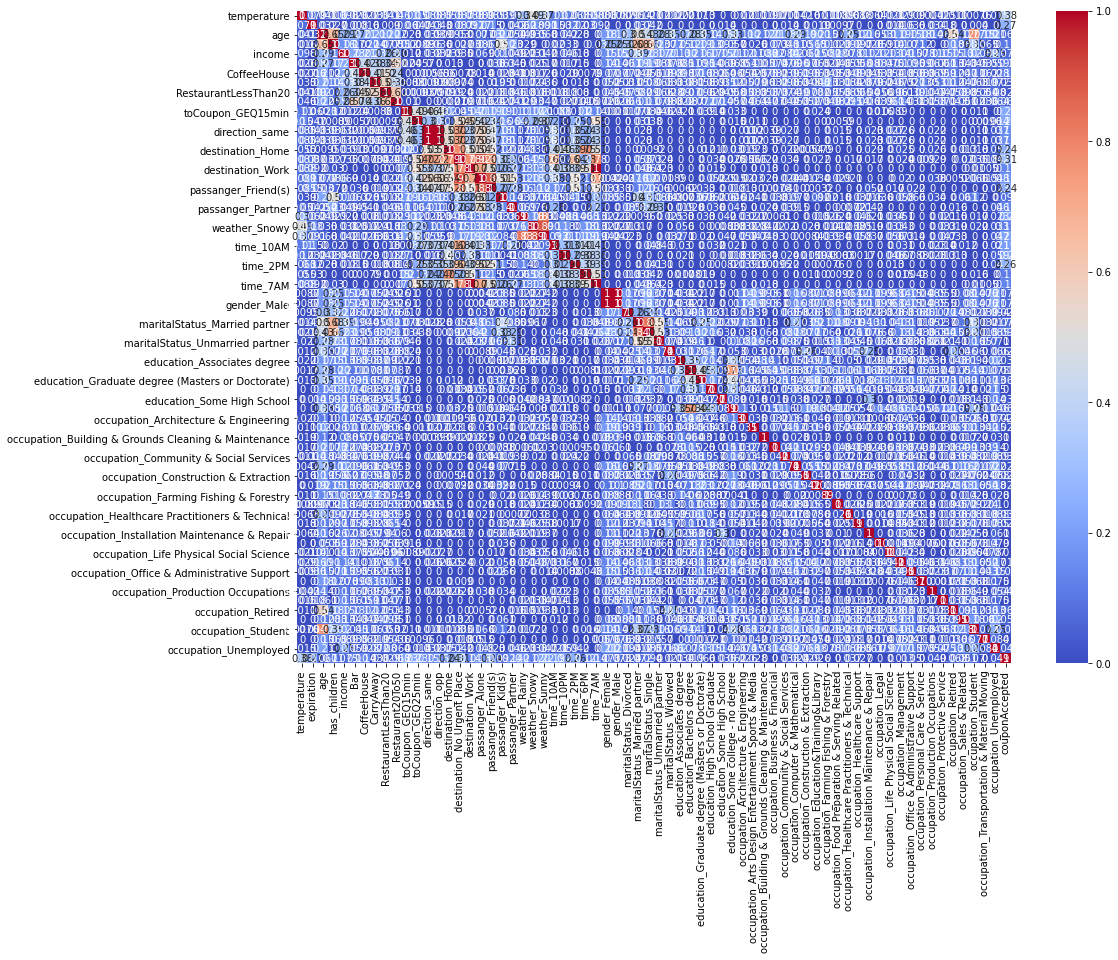

In [123]:
# Plot phi K correlation in heat map
plt.figure(figsize = (16,12))
sns.heatmap(hot_train.phik_matrix(), annot=True,cmap='coolwarm')

In [124]:
# Sort to find the attributes that are the highest correlated to target attribute
# See last column of materix
phik_train.sort_values(ascending=False, by='couponAccepted',).head(21)

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,couponAccepted
couponAccepted,0.375148,0.265349,0.067005,0.106373,0.075424,0.103994,0.136762,0.037724,0.029117,0.067527,0.233497,0.229595,0.154184,0.154184,0.242390,0.313464,0.135565,0.179080,0.242256,0.091821,0.137469,0.199035,0.121097,0.218162,0.191652,0.201196,0.263760,0.115698,0.135565,0.073015,0.073015,0.024130,0.071540,0.094296,0.000000,0.020973,0.034494,0.019240,0.066325,0.000000,0.034525,0.061883,0.025595,0.027686,0.000000,0.000000,0.033063,0.023683,0.029121,0.026056,0.000000,0.000000,0.036781,0.027168,0.000000,0.000000,0.000000,0.012651,0.049716,0.000000,0.049368,0.000000,0.067534,0.051190,0.070113,0.000000,0.049413,1.000000
temperature,1.000000,0.078903,0.041330,0.015502,0.098224,0.026372,0.026752,0.035102,0.041329,0.046224,0.107562,0.146676,0.084684,0.084684,0.055434,0.087219,0.088425,0.088792,0.085286,0.038596,0.049747,0.299445,0.492507,0.366919,0.112539,0.120112,0.062842,0.054943,0.088425,0.008701,0.008701,0.009534,0.014492,0.021381,0.020121,0.012147,0.022417,0.001737,0.012908,0.000000,0.000000,0.000000,0.020445,0.010583,0.018913,0.016677,0.010607,0.004217,0.016045,0.000000,0.011119,0.008875,0.006845,0.018458,0.006356,0.000000,0.020766,0.029018,0.009042,0.000000,0.004235,0.014771,0.010890,0.000000,0.007559,0.000000,0.015056,0.375148
destination_No Urgent Place,0.087219,0.086610,0.030265,0.026645,0.034709,0.000000,0.007252,0.003959,0.023512,0.019399,0.044548,0.542501,0.724714,0.724714,0.785864,1.000000,0.783531,0.921182,0.808421,0.334417,0.261041,0.064024,0.150195,0.165209,0.676257,0.072709,0.642050,0.277720,0.783531,0.000000,0.000000,0.000000,0.052972,0.072731,0.024353,0.000000,0.000000,0.000000,0.000000,0.033530,0.000000,0.025477,0.005637,0.015750,0.022337,0.000000,0.033506,0.000000,0.000000,0.021603,0.000000,0.000000,0.016739,0.000000,0.016545,0.000000,0.000000,0.023725,0.000000,0.008988,0.028830,0.000000,0.000000,0.020477,0.035162,0.017629,0.041842,0.313464
expiration,0.078903,1.000000,0.031557,0.027127,0.000000,0.008038,0.015706,0.000000,0.009003,0.000000,0.059938,0.047164,0.042914,0.042914,0.000000,0.086610,0.091548,0.169504,0.153723,0.000000,0.042090,0.061789,0.175043,0.090834,0.146346,0.032228,0.119224,0.029978,0.091548,0.000000,0.000000,0.000000,0.036962,0.041800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013501,0.000000,0.000000,0.000000,0.000000,0.000000,0.013740,0.000000,0.000000,0.018894,

### Updating Training Set to only Have Selected Features

In [125]:
# The above feature selection methods displayed the top 20 features that were found to have the highest imapct to target classfication
# Ouf of the top 20 features for each selection method, 11 appeared in all three selection methods
# These 11 features will be used to build the model
# Model can be optimized by adding or removing attributes
feature_att = ['temperature', 'expiration', 'time_2PM', 'destination_No Urgent Place', 'passanger_Friend(s)', 'destination_Home', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'CoffeeHouse', 'passanger_Alone', 'destination_Work']
feature_att

['temperature',
 'expiration',
 'time_2PM',
 'destination_No Urgent Place',
 'passanger_Friend(s)',
 'destination_Home',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'CoffeeHouse',
 'passanger_Alone',
 'destination_Work']

In [126]:
# Select features want to keep for the machine learning model
feat_x_train = hot_x_train[feature_att]

In [127]:
feat_x_train

,temperature,expiration,time_2PM,destination_No Urgent Place,passanger_Friend(s),destination_Home,toCoupon_GEQ15min,toCoupon_GEQ25min,CoffeeHouse,passanger_Alone,destination_Work
9066,80,2,0,1,0,0,1,0,3,1,0
6037,80,24,0,0,0,1,0,0,2,1,0
10395,80,24,0,0,0,1,0,0,2,1,0
12633,80,2,0,0,0,0,0,0,4,1,1
8591,80,24,0,1,0,0,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11053,55,24,0,0,0,0,0,0,3,1,1
6001,80,24,0,0,0,0,1,1,1,1,1
5008,80,24,0,1,1,0,1,0,1,0,0
6693,55,2,0,1,1,0,1,0,5,0,0


### Updating the Test Set

In [128]:
x_test

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
426,Work,Alone,Sunny,55,7AM,24,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,NaN,never,less1,less1,1~3,less1,1,1,1,0,1
6025,Work,Alone,Sunny,55,7AM,24,Female,26,Single,0,Bachelors degree,Unemployed,Less than $12500,NaN,4~8,1~3,gt8,4~8,1~3,1,1,0,0,1
8835,Home,Alone,Snowy,30,10PM,2,Female,31,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,$100000 or More,NaN,less1,less1,gt8,4~8,less1,1,1,1,0,1
6921,No Urgent Place,Partner,Snowy,30,2PM,2,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,NaN,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
12400,No Urgent Place,Alone,Sunny,80,10AM,2,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,NaN,less1,NaN,1~3,1~3,1~3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,Work,Alone,Rainy,55,7AM,2,Female,46,Married partner,0,Bachelors degree,Construction & Extraction,$12500 - $24999,NaN,1~3,4~8,4~8,1~3,less1,1,1,1,0,1
4940,No Urgent Place,Alone,Sunny,80,10AM,24,Male,31,Single,0,High School Graduate,Production Occupations,$25000 - $37499,NaN,1~3,never,4~8,1~3,less1,1,0,0,0,1
6915,No Urgent Place,Friend(s),Snowy,30,10AM,24,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,NaN,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
234,Work,Alone,Sunny,80,7AM,2,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,NaN,1~3,1~3,1~3,1~3,1~3,1,0,0,1,0


In [129]:
hot_x_test = x_test.copy()
hot_x_test

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
426,Work,Alone,Sunny,55,7AM,24,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,NaN,never,less1,less1,1~3,less1,1,1,1,0,1
6025,Work,Alone,Sunny,55,7AM,24,Female,26,Single,0,Bachelors degree,Unemployed,Less than $12500,NaN,4~8,1~3,gt8,4~8,1~3,1,1,0,0,1
8835,Home,Alone,Snowy,30,10PM,2,Female,31,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,$100000 or More,NaN,less1,less1,gt8,4~8,less1,1,1,1,0,1
6921,No Urgent Place,Partner,Snowy,30,2PM,2,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,NaN,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
12400,No Urgent Place,Alone,Sunny,80,10AM,2,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,NaN,less1,NaN,1~3,1~3,1~3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,Work,Alone,Rainy,55,7AM,2,Female,46,Married partner,0,Bachelors degree,Construction & Extraction,$12500 - $24999,NaN,1~3,4~8,4~8,1~3,less1,1,1,1,0,1
4940,No Urgent Place,Alone,Sunny,80,10AM,24,Male,31,Single,0,High School Graduate,Production Occupations,$25000 - $37499,NaN,1~3,never,4~8,1~3,less1,1,0,0,0,1
6915,No Urgent Place,Friend(s),Snowy,30,10AM,24,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,NaN,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
234,Work,Alone,Sunny,80,7AM,2,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,NaN,1~3,1~3,1~3,1~3,1~3,1,0,0,1,0


#### Impute Null Values on Test Set

In [130]:
# Check for null values
hot_x_test.isna().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     3761
Bar                       29
CoffeeHouse               69
CarryAway                 41
RestaurantLessThan20      41
Restaurant20To50          60
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64

##### Car

In [131]:
# This attribute is basically missing values for almost all the records.  As such, it will not provide much value to the machine learning algorithms
# It will be dropped from the test set as was done for the training set
hot_x_test = hot_x_test.drop(columns=['car'])
print('car attribute dropped')

car attribute dropped


##### Bar

In [132]:
# Replace Null values for Bar with mode determined from training set
hot_x_test['Bar'] = hot_x_test['Bar'].fillna(bar_mode)

##### Coffee House

In [133]:
# Replace Null values for CoffeeHouse with mode determined from training set
hot_x_test['CoffeeHouse'] = hot_x_test['CoffeeHouse'].fillna(CoffeeHouse_mode)

##### Carry Away

In [134]:
# Replace Null values for CarryAway with mode determined from training set
hot_x_test['CarryAway'] = hot_x_test['CarryAway'].fillna(CarryAway_mode)

##### Restaurant Less than 20

In [135]:
# Replace Null values for RestaurantLessThan20 with mode determined from training set
hot_x_test['RestaurantLessThan20'] = hot_x_test['RestaurantLessThan20'].fillna(RestaurantLessThan20_mode)

##### Restaurant 20 to 50

In [136]:
# Replace Null values for Restaurant20To50 with mode determined from the training set
hot_x_test['Restaurant20To50'] = hot_x_test['Restaurant20To50'].fillna(Restaurant20To50_mode)

##### Verify that all Null Values are Imputed

In [137]:
# Check that all Null Values are eliminated
hot_x_test.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
dtype: int64

#### Encoding Ordinal Attributes

In [138]:
# Encode Feature attributes like training set
hot_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 426 to 2663
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3806 non-null   object
 1   passanger             3806 non-null   object
 2   weather               3806 non-null   object
 3   temperature           3806 non-null   int64 
 4   time                  3806 non-null   object
 5   expiration            3806 non-null   int64 
 6   gender                3806 non-null   object
 7   age                   3806 non-null   object
 8   maritalStatus         3806 non-null   object
 9   has_children          3806 non-null   int64 
 10  education             3806 non-null   object
 11  occupation            3806 non-null   object
 12  income                3806 non-null   object
 13  Bar                   3806 non-null   object
 14  CoffeeHouse           3806 non-null   object
 15  CarryAway             3806 non-null 

##### Age

In [139]:
# Fit and transform data
hot_x_test['age'] = enc_age.fit_transform(hot_x_test['age'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


##### Income

In [140]:
# Fit and transform data
hot_x_test['income'] = enc_income.fit_transform(hot_x_test['income'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


##### Bar

In [141]:
# Fit and transform data
hot_x_test['Bar'] = enc_bar.fit_transform(hot_x_test['Bar'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


##### Coffee House

In [142]:
# Fit and transform data
hot_x_test['CoffeeHouse'] = enc_cof.fit_transform(hot_x_test['CoffeeHouse'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


##### Carry Away

In [143]:
# Fit and transform data
hot_x_test['CarryAway'] = enc_carry.fit_transform(hot_x_test['CarryAway'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


##### Restaurant Less than 20

In [144]:
# Fit and transform data
hot_x_test['RestaurantLessThan20'] = enc_rest20.fit_transform(hot_x_test['RestaurantLessThan20'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


##### Restaurant 20 to 50

In [145]:
# Fit and transform data
hot_x_test['Restaurant20To50'] = enc_rest50.fit_transform(hot_x_test['Restaurant20To50'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


##### Verify Datatype Distribution

In [146]:
hot_x_test.head()

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
426,Work,Alone,Sunny,55,7AM,24,Male,8,Married partner,0,Bachelors degree,Personal Care & Service,5,1,2,2,3,2,1,1,1,0,1
6025,Work,Alone,Sunny,55,7AM,24,Female,3,Single,0,Bachelors degree,Unemployed,1,4,3,5,4,3,1,1,0,0,1
8835,Home,Alone,Snowy,30,10PM,2,Female,4,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,9,2,2,5,4,2,1,1,1,0,1
6921,No Urgent Place,Partner,Snowy,30,2PM,2,Male,4,Unmarried partner,0,Some college - no degree,Sales & Related,6,5,3,3,4,2,1,1,0,0,1
12400,No Urgent Place,Alone,Sunny,80,10AM,2,Female,5,Married partner,1,Bachelors degree,Education&Training&Library,4,2,2,3,3,3,1,0,0,0,1


In [147]:
hot_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 426 to 2663
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3806 non-null   object
 1   passanger             3806 non-null   object
 2   weather               3806 non-null   object
 3   temperature           3806 non-null   int64 
 4   time                  3806 non-null   object
 5   expiration            3806 non-null   int64 
 6   gender                3806 non-null   object
 7   age                   3806 non-null   int64 
 8   maritalStatus         3806 non-null   object
 9   has_children          3806 non-null   int64 
 10  education             3806 non-null   object
 11  occupation            3806 non-null   object
 12  income                3806 non-null   int64 
 13  Bar                   3806 non-null   int64 
 14  CoffeeHouse           3806 non-null   int64 
 15  CarryAway             3806 non-null 

#### One Hot Encoding

In [148]:
# perform the one hot encoding on test set
# columns = variables to be encoded
# prefix = name to appear in front of dummy variables
hot_x_test = pd.get_dummies(hot_x_test, columns = catCols, prefix = catCols)

In [149]:
hot_x_test

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
426,55,24,8,0,5,1,2,2,3,2,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6025,55,24,3,0,1,4,3,5,4,3,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8835,30,2,4,0,9,2,2,5,4,2,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6921,30,2,4,0,6,5,3,3,4,2,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12400,80,2,5,1,4,2,2,3,3,3,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,55,2,7,0,2,3,4,4,3,2,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4940,80,24,4,0,3,3,1,4,3,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6915,30,24,4,0,6,5,3,3,4,2,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
234,80,2,2,0,8,3,3,3,3,3,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Updating Test Set to only Have Selected Features

In [150]:
# Ensure Test set has same features as training set
feat_x_test = hot_x_test[feature_att]

In [151]:
feat_x_test

,temperature,expiration,time_2PM,destination_No Urgent Place,passanger_Friend(s),destination_Home,toCoupon_GEQ15min,toCoupon_GEQ25min,CoffeeHouse,passanger_Alone,destination_Work
426,55,24,0,0,0,0,1,1,2,1,1
6025,55,24,0,0,0,0,1,0,3,1,1
8835,30,2,0,0,0,1,1,1,2,1,0
6921,30,2,1,1,0,0,1,0,3,0,0
12400,80,2,0,1,0,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
8185,55,2,0,0,0,0,1,1,4,1,1
4940,80,24,0,1,0,0,0,0,1,1,0
6915,30,24,0,1,1,0,1,0,3,0,0
234,80,2,0,0,0,0,0,0,3,1,1


# Decision Trees

### Create Decision Tree Classifier

In [152]:
# Create classifier
from sklearn import tree

# Non weighted version
#clf = tree.DecisionTreeClassifier(max_depth=5)

# Balance the weighting of a unbalanced target attribute
clf = tree.DecisionTreeClassifier(criterion= 'gini', max_depth=5, class_weight='balanced') # gini used as less computationally expensive than entropy

### Using Stratified K Fold for Training Set of Decision Tree

In [153]:
# Shape of X and Y
feat_x_train.shape, y_train.shape

((8878, 11), (8878,))

In [164]:
# Create empty list to store performance metrics
accuracy, precs, recs, f1ss, model_time = [], [], [], [], []

In [165]:
# Create variable for stratified K Fold
# k=10 fold
# Stratified K fold preserves the distribution of the values of the target attribute and prevents overfitting like cross validation
# Used for less bias than in train/split
# Applied to training set
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

# Returns the number of splitting iterations in the cross validator
skf.get_n_splits() 

for train_index, test_index in skf.split(feat_x_train,y_train):
  
  start_time = time.process_time() # start counting time

  print("TRAIN:", train_index, "VALIDATION:",test_index)
  x1_train, x1_test = feat_x_train.iloc[train_index], feat_x_train.iloc[test_index]
  y1_train, y1_test = y_train.iloc[train_index], y_train.iloc[test_index]
  
  clf.fit(x1_train, y1_train) # Train model on training set
  prediction = clf.predict(x1_test) # Test model on training test set
  score = accuracy_score(y1_test, prediction) # calculating accuracy between true labels vs classifier predicted labels
  prec = precision_score(y1_test, prediction, average='weighted') # calculating precision for unbalanced multiclass
  rec = recall_score(y1_test, prediction, average='weighted') # calculating recall for unbalanced multiclass
  f1s = f1_score(y1_test, prediction, average='weighted') # calculating f1 for unbalanced multiclass
  
  end_time = time.process_time() # stop counting time

  accuracy.append(score)
  precs.append(prec)
  recs.append(rec)
  f1ss.append(f1s)
  model_time.append(end_time - start_time)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precs}')
print(f'Recall: {recs}')
print(f'F1 Score: {f1ss}')
print(f'Runtime: {model_time}')

TRAIN: [   0    1    2 ... 8874 8875 8876] VALIDATION: [  15   21   23   26   35   36   50   56   57   60   63   78   79   83
  115  119  132  163  169  176  178  215  217  232  254  257  259  264
  265  281  294  305  312  318  323  325  328  345  356  377  379  381
  384  394  411  419  427  465  470  473  486  497  515  524  531  542
  543  564  572  576  585  618  625  641  646  651  666  673  682  684
  689  692  693  716  718  720  729  735  752  773  788  794  795  801
  805  829  855  867  870  873  897  898  900  906  907  921  923  931
  936  949  951  955  963  968  999 1003 1006 1009 1013 1033 1035 1061
 1070 1071 1082 1095 1100 1106 1112 1125 1144 1155 1172 1178 1194 1200
 1201 1207 1209 1227 1261 1262 1268 1281 1291 1309 1311 1322 1324 1328
 1338 1345 1402 1407 1414 1425 1427 1428 1441 1461 1503 1527 1543 1547
 1552 1562 1566 1574 1584 1596 1600 1601 1607 1620 1635 1665 1679 1690
 1694 1700 1714 1738 1747 1750 1754 1760 1763 1766 1787 1801 1811 1821
 1839 1847 1894 1898 1

In [166]:
# Find the mean of the accuracies, precision, recall, F1 Score, and runtime
# Converted the list into an array
print(f'Accuracy Mean: {np.array(accuracy).mean()}')
print(f'Precision Mean: {np.array(precs).mean()}')
print(f'Recall Mean: {np.array(recs).mean()}')
print(f'F1 Score Mean: {np.array(f1ss).mean()}')
print(f'Runtime Mean: {np.array(model_time).mean()}')

Accuracy Mean: 0.31876225154128196
Precision Mean: 0.4615785158217802
Recall Mean: 0.31876225154128196
F1 Score Mean: 0.2962275986822629
Runtime Mean: 0.04865144129999806


In [178]:
# Apply classifier to test set

# Create empty list
accuracy, precs, recs, f1ss, model_time = [], [], [], [], []

for train_index, test_index in skf.split(feat_x_train,y_train):
  
  start_time = time.process_time() # start counting time

  print("TRAIN:", train_index, "VALIDATION:",test_index)
  x1_train, x1_test = feat_x_train.iloc[train_index], feat_x_train.iloc[test_index]
  y1_train, y1_test = y_train.iloc[train_index], y_train.iloc[test_index]
  
  clf.fit(x1_train, y1_train) # Train model on training set
  prediction = clf.predict(feat_x_test) # Test model on test set
  score = accuracy_score(y_test, prediction) # calculating accuracy between true labels vs classifier predicted labels
  prec = precision_score(y_test, prediction, average='weighted') # calculating precision for unbalanced multiclass
  rec = recall_score(y_test, prediction, average='weighted') # calculating recall for unbalanced multiclass
  f1s = f1_score(y_test, prediction, average='weighted') # calculating f1 for unbalanced multiclass

  end_time = time.process_time() # stop counting time

  accuracy.append(score)
  precs.append(prec)
  recs.append(rec)
  f1ss.append(f1s)
  model_time.append(end_time - start_time)

#print(f'Accuracy: {accuracy}, Precision: {precs}, Recall: {recs}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precs}')
print(f'Recall: {recs}')
print(f'F1 Score: {f1ss}')
print(f'Runtime: {model_time}')

TRAIN: [   1    2    3 ... 8873 8874 8877] VALIDATION: [   0    9   25   37   50   69   71   73   78   83   91  100  109  114
  119  123  128  130  137  141  154  158  162  164  172  176  179  182
  205  210  211  229  235  242  262  264  266  283  287  296  305  306
  331  362  369  372  376  379  382  387  410  414  422  432  433  441
  449  453  454  457  479  489  501  504  508  517  528  543  572  630
  631  632  639  643  649  663  667  683  705  721  734  737  741  747
  752  772  779  794  797  800  802  811  826  833  846  903  910  911
  924  928  933  945  949  963  973  983  984  989 1002 1003 1004 1041
 1052 1055 1070 1084 1090 1103 1113 1182 1190 1200 1205 1213 1230 1232
 1233 1239 1269 1288 1295 1303 1304 1306 1316 1331 1351 1369 1383 1388
 1393 1396 1403 1405 1429 1452 1454 1456 1461 1474 1477 1486 1535 1543
 1549 1558 1570 1574 1585 1588 1600 1602 1649 1652 1667 1675 1683 1716
 1720 1740 1741 1758 1782 1792 1796 1806 1813 1815 1819 1822 1836 1871
 1880 1906 1944 1967 1

In [179]:
# Find the mean of the accuracies, precision, recall, and F1 Score
# Converted the list into an array
print(f'Accuracy Mean: {np.array(accuracy).mean()}')
print(f'Precision Mean: {np.array(precs).mean()}')
print(f'Recall Mean: {np.array(recs).mean()}')
print(f'F1 Score Mean: {np.array(f1ss).mean()}')
print(f'Runtime Mean: {np.array(model_time).mean()}')

Accuracy Mean: 0.31589595375722535
Precision Mean: 0.451751011315222
Recall Mean: 0.31589595375722535
F1 Score Mean: 0.3024119142916459
Runtime Mean: 0.10395540429999812


### Analyze one Decision Tree through Train/Split

Class Names ['Coffee House' 'Not Accepted' 'Restaurant(<20)' 'Restaurant(20-50)'
 'Carry out & Take away' 'Bar']


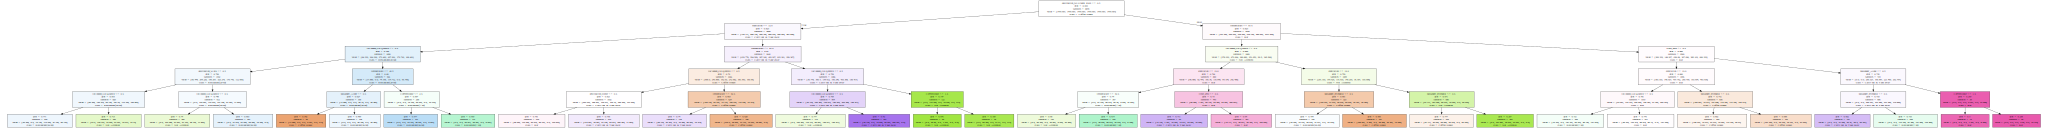

In [167]:
# Train model using training sets
clf = clf.fit(feat_x_train, y_train)

#Get unique class values to display on the tree
class_values = y_train.unique()
print ("Class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_att, 
                                class_names=class_values, 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Export tree to file
graph.render(filename='tree.dot')
graph

#### Predict on test set

In [168]:
y_pred = clf.predict(feat_x_test)

#### Decision Tree Confusion Matrix and Classification Report

In [169]:
# Confusion Matrix For Multi Class
from sklearn.metrics import multilabel_confusion_matrix

classlab = 'Bar', 'Not Accepted', 'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Restaurant(20-50)'

cfDT=multilabel_confusion_matrix(y_test, y_pred, labels = classlab)
print ("Confusion Matrix")
print(cfDT)
# Matrix
# TN | FP
# --------
# FN | TP

Confusion Matrix
[[[2951  607]
  [ 103  145]]

 [[1972  191]
  [1299  344]]

 [[2780  498]
  [ 195  333]]

 [[2825  382]
  [ 414  185]]

 [[2772  443]
  [ 407  184]]

 [[3217  392]
  [  95  102]]]


In [171]:
# Classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred)) 

                       precision    recall  f1-score   support

                  Bar       0.19      0.58      0.29       248
Carry out & Take away       0.40      0.63      0.49       528
         Coffee House       0.33      0.31      0.32       599
         Not Accepted       0.64      0.21      0.32      1643
    Restaurant(20-50)       0.21      0.52      0.30       197
      Restaurant(<20)       0.29      0.31      0.30       591

             accuracy                           0.34      3806
            macro avg       0.34      0.43      0.34      3806
         weighted avg       0.45      0.34      0.34      3806



#### ROC AUC (Area Under Receiver Operating Characteristic Curve)

In [172]:
# How good is the classifier a distinguishing between classes

# Determine probability
y_pred_prob = clf.predict_proba(feat_x_test)

# Deteremine roc auc score
# multi_class = 'ovr' means one vs rest. Computes AUC of each class against the rest
roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

0.704376645123469

# Random Forest

### Create Random Forest Classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier

# Non weighted version
#rfclf = RandomForestClassifier(criterion= 'gini', n_estimators=100)

# Create classifier with specific number of decision trees
# n_estimators is number of trees in forest
# gini used as less computationally expensive than entropy
#rfclf = RandomForestClassifier(criterion= 'gini',n_estimators=25, class_weight='balanced')
#rfclf = RandomForestClassifier(criterion= 'gini',n_estimators=50, class_weight='balanced')
#rfclf = RandomForestClassifier(criterion= 'gini',n_estimators=75, class_weight='balanced')
rfclf = RandomForestClassifier(criterion= 'gini',n_estimators=100, class_weight='balanced')
#rfclf = RandomForestClassifier(criterion= 'gini',n_estimators=250, class_weight='balanced')
#rfclf = RandomForestClassifier(criterion= 'gini',n_estimators=500, class_weight='balanced')

### Using Stratified K Fold for Random Forest 

In [174]:
# Shape of X and Y
feat_x_train.shape, y_train.shape

((8878, 11), (8878,))

In [175]:
# Create empty list
RTaccuracy, RTprecs, RTrecs, RTf1ss, RTmodel_time = [], [], [], [], []

In [176]:
# Create variable for stratified K Fold
# k=10 fold
# Stratified K fold preserves the distribution of the values of the target attribute and prevents overfitting like cross validation
# Used for less bias than in train/split
RTskf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

# Returns the number of splitting iterations in the cross validator
RTskf.get_n_splits()

for train_index2, test_index2 in RTskf.split(feat_x_train, y_train):
  
  RTstart_time = time.process_time() # start counting time
  
  print("TRAIN:", train_index2, "VALIDATION:",test_index2)
  x2_train, x2_test = feat_x_train.iloc[train_index2], feat_x_train.iloc[test_index2]
  y2_train, y2_test = y_train.iloc[train_index2], y_train.iloc[test_index2]
  
  rfclf.fit(x2_train, y2_train) # Train model on training set
  rfprediction = rfclf.predict(x2_test) # Test Model on training test set
  RTscore = accuracy_score(y2_test, rfprediction) # calculating accuracy between true labels vs classifier predicted labels
  RTprec = precision_score(y2_test, rfprediction, average='weighted') # calculating precision for unbalanced multiclass
  RTrec = recall_score(y2_test, rfprediction, average='weighted') # calculating recall for unbalanced multiclass
  RTf1s = f1_score(y2_test, rfprediction, average='weighted') # calculating recall for unbalanced multiclass
  
  RTend_time = time.process_time() # stop counting time
  
  RTaccuracy.append(RTscore)
  RTprecs.append(RTprec)
  RTrecs.append(RTrec)
  RTf1ss.append(RTf1s)
  RTmodel_time.append(RTend_time - RTstart_time)

print(f'Accuracy: {RTaccuracy}')
print(f'Precision: {RTprecs}')
print(f'Recall: {RTrecs}')
print(f'F1 Score: {RTf1ss}')
print(f'Runtime: {RTmodel_time}')

TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [   4    6   12   22   63   65   70   95   96  105  124  125  144  164
  177  196  223  224  227  232  240  246  252  254  273  277  281  283
  297  298  310  311  316  317  325  330  341  342  348  352  354  357
  358  371  376  378  392  394  396  433  440  445  454  457  461  470
  486  489  500  502  524  553  562  563  565  576  579  590  596  615
  640  656  658  672  673  675  679  695  697  699  701  711  725  730
  732  738  748  758  761  766  767  791  794  796  804  805  815  828
  859  860  878  888  901  917  921  950  966  969  974  976  987  998
 1012 1015 1036 1074 1119 1133 1168 1170 1176 1185 1226 1228 1242 1252
 1270 1273 1293 1298 1320 1335 1344 1348 1350 1353 1386 1407 1422 1427
 1428 1430 1435 1439 1445 1459 1471 1491 1492 1509 1511 1523 1526 1534
 1536 1539 1557 1560 1568 1583 1584 1592 1620 1673 1678 1708 1736 1773
 1779 1786 1794 1799 1814 1833 1866 1879 1880 1882 1883 1885 1887 1892
 1912 1913 1931 1935 1

In [177]:
# Find the mean of the accuracies, precision, recall, F1 Score, and runtime
# Converted the list into an array
print(f'Accuracy Mean: {np.array(RTaccuracy).mean()}')
print(f'Precision Mean: {np.array(RTprecs).mean()}')
print(f'Recall Mean: {np.array(RTrecs).mean()}')
print(f'F1 Score Mean: {np.array(RTf1ss).mean()}')
print(f'Runtime Mean: {np.array(RTmodel_time).mean()}')

Accuracy Mean: 0.41596839229308225
Precision Mean: 0.5343033558836577
Recall Mean: 0.41596839229308225
F1 Score Mean: 0.39211926229178945
Runtime Mean: 0.5223019984000004


In [180]:
# Apply classifier to test set

# Create empty list
RTaccuracy, RTprecs, RTrecs, RTf1ss, RTmodel_time = [], [], [], [], []

for train_index2, test_index2 in RTskf.split(feat_x_train, y_train):
  
  RTstart_time = time.process_time() # start time

  print("TRAIN:", train_index2, "VALIDATION:",test_index2)
  x2_train, x2_test = feat_x_train.iloc[train_index2], feat_x_train.iloc[test_index2]
  y2_train, y2_test = y_train.iloc[train_index2], y_train.iloc[test_index2]
  
  rfclf.fit(x2_train, y2_train) # Train model on training set
  rfprediction = rfclf.predict(feat_x_test) # Test Model on test set
  RTscore = accuracy_score(y_test, rfprediction) # calculating accuracy between true labels vs classifier predicted labels
  RTprec = precision_score(y_test, rfprediction, average='weighted') # calculating precision for unbalanced multiclass
  RTrec = recall_score(y_test, rfprediction, average='weighted') # calculating recall for unbalanced multiclass
  RTf1s = f1_score(y_test, rfprediction, average='weighted') # calculating recall for unbalanced multiclass

  RTend_time = time.process_time() # stop counting time

  RTaccuracy.append(RTscore)
  RTprecs.append(RTprec)
  RTrecs.append(RTrec)
  RTf1ss.append(RTf1s)
  RTmodel_time.append(RTend_time - RTstart_time)

print(f'Accuracy: {RTaccuracy}')
print(f'Precision: {RTprecs}')
print(f'Recall: {RTrecs}')
print(f'F1 Score: {RTf1ss}')
print(f'Runtime: {RTmodel_time}')

TRAIN: [   0    1    2 ... 8874 8875 8877] VALIDATION: [   5    7   11   20   33   44   67   71   72   81   92   98  102  121
  130  133  145  155  165  169  170  202  204  218  228  231  232  238
  239  241  242  249  277  278  281  300  304  336  338  340  352  358
  370  374  377  387  392  401  416  426  476  483  486  494  521  549
  551  556  557  568  583  588  590  603  606  607  619  627  630  639
  642  651  658  661  684  689  693  698  702  703  710  725  731  745
  753  759  785  786  808  828  832  842  853  858  870  884  891  918
  922  924  925  960  982  986  988  994 1008 1033 1038 1065 1086 1087
 1120 1144 1146 1153 1173 1175 1177 1180 1187 1191 1219 1247 1250 1276
 1279 1290 1310 1311 1312 1315 1332 1334 1340 1352 1354 1356 1357 1360
 1363 1365 1368 1388 1390 1393 1395 1399 1404 1420 1445 1446 1465 1485
 1502 1514 1516 1517 1524 1537 1543 1563 1565 1569 1570 1594 1626 1639
 1650 1652 1654 1657 1670 1688 1689 1692 1698 1711 1717 1724 1725 1738
 1740 1742 1748 1751 1

In [181]:
# Find the mean of the accuracies, precision, recall, and F1 Score
# Converted the list into an array
print(f'Accuracy Mean: {np.array(RTaccuracy).mean()}')
print(f'Precision Mean: {np.array(RTprecs).mean()}')
print(f'Recall Mean: {np.array(RTrecs).mean()}')
print(f'F1 Score Mean: {np.array(RTf1ss).mean()}')
print(f'Runtime Mean: {np.array(RTmodel_time).mean()}')

Accuracy Mean: 0.39540199684708355
Precision Mean: 0.5248783119201089
Recall Mean: 0.39540199684708355
F1 Score Mean: 0.37529187292092925
Runtime Mean: 0.621165541800002


### Analyze one Random Forest Through Train/Split

In [182]:
# Train model using training sets
rfclf.fit(feat_x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predict on Test Set

In [183]:
# Predict on test set
rfy_pred = rfclf.predict(feat_x_test)

#### Random Forest Confusion Matrix and Classification Report

In [184]:
# Confusion Matrix For Multi Class
from sklearn.metrics import multilabel_confusion_matrix

classlab = 'Bar', 'Not Accepted', 'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Restaurant(20-50)'

cfDT=multilabel_confusion_matrix(y_test, rfy_pred, labels = classlab)
print ("Confusion Matrix")
print(cfDT)
# Matrix
# TN | FP
# --------
# FN | TP

Confusion Matrix
[[[3053  505]
  [  82  166]]

 [[2061  102]
  [1371  272]]

 [[2751  527]
  [ 171  357]]

 [[2817  390]
  [ 297  302]]

 [[2810  405]
  [ 339  252]]

 [[3215  394]
  [  63  134]]]


In [185]:
# Classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, rfy_pred)) 

                       precision    recall  f1-score   support

                  Bar       0.25      0.67      0.36       248
Carry out & Take away       0.40      0.68      0.51       528
         Coffee House       0.44      0.50      0.47       599
         Not Accepted       0.73      0.17      0.27      1643
    Restaurant(20-50)       0.25      0.68      0.37       197
      Restaurant(<20)       0.38      0.43      0.40       591

             accuracy                           0.39      3806
            macro avg       0.41      0.52      0.40      3806
         weighted avg       0.53      0.39      0.37      3806



#### ROC AUC (Area Under Receiver Operating Characteristic Curve)

In [186]:
# How good is the classifier a distinguishing between classes

# Determine probability
rfy_pred_prob = rfclf.predict_proba(feat_x_test)

# Deteremine roc auc score
# multi_class = 'ovr' means one vs rest. Computes AUC of each class against the rest
roc_auc_score(y_test, rfy_pred_prob, multi_class='ovr', average='weighted')

0.781763444939362

### View single tree for Random Forest

In [187]:
from sklearn.tree import export_graphviz
import pydot

# Select one tree from the forest
rf_tree = rfclf.estimators_[5]

# Export the image to a dot file
export_graphviz(rf_tree, out_file = 'rftree.dot', feature_names = feature_att, rounded = True, precision = 1, class_names=classlab)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('rftree.dot')

# Write graph to a png file
graph.write_png('rftree.png')

### Random Forest Important Features 

In [188]:
# See important feature names

# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

feature_imp = pd.Series(rfclf.feature_importances_,index=feature_att).sort_values(ascending=False)
feature_imp

temperature                    0.250733
toCoupon_GEQ15min              0.156927
expiration                     0.120519
CoffeeHouse                    0.115243
passanger_Alone                0.074701
passanger_Friend(s)            0.065649
toCoupon_GEQ25min              0.065059
time_2PM                       0.058885
destination_No Urgent Place    0.031799
destination_Home               0.030387
destination_Work               0.030099
dtype: float64

No handles with labels found to put in legend.


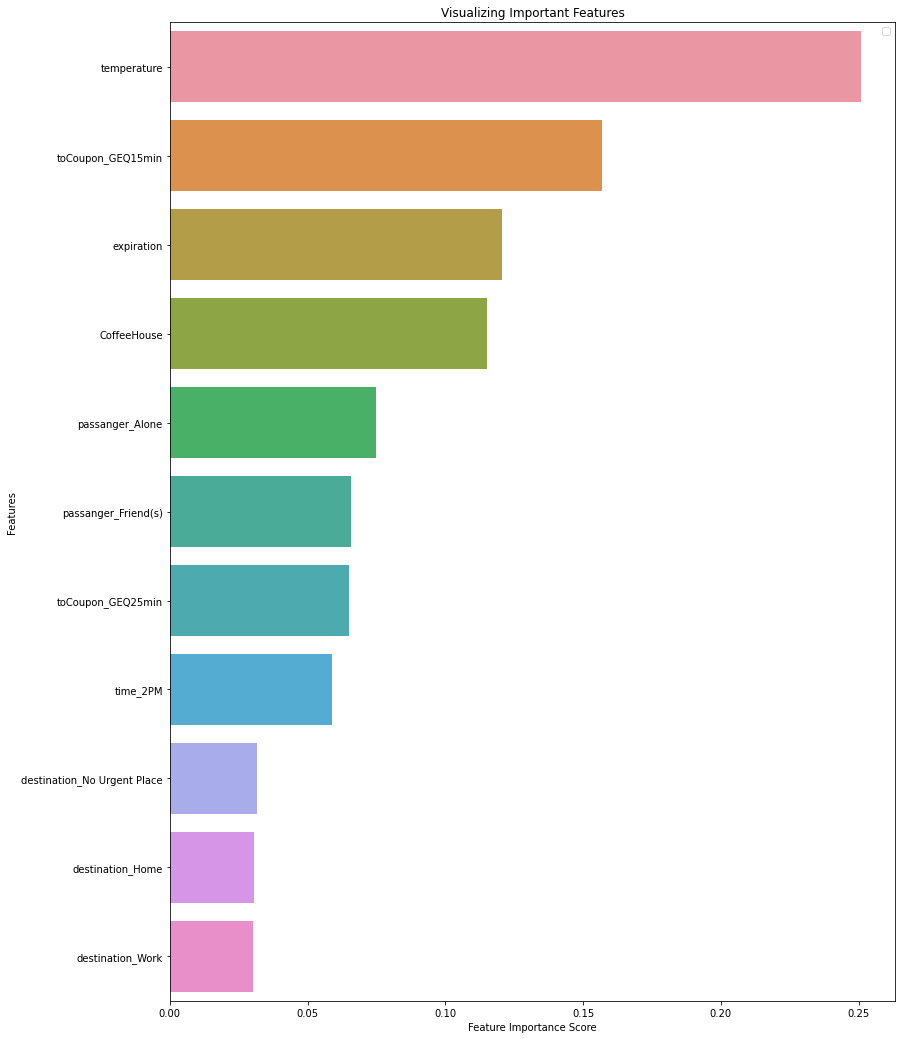

In [189]:
%matplotlib inline
# Creating a bar plot
fig, ax=plt.subplots(figsize = (13,18))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()